<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/23rdOct_RevenuePrediction_Dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement: Revenue Prediction for Restaurants**
  #### **Given a dataset of restaurant-related features, predict the total revenue that a restaurant will generate.**

  #### **This problem aims to develop a predictive model that can accurately estimate a restaurant's future revenue based on historical data and relevant factors. The model can be used by restaurant owners, investors, and analysts to make informed decisions about business strategies, expansion plans, and resource allocation.**

  #### **Link to dataset: https://drive.google.com/file/d/1T5ysdeefTt6GgWLsiWAPteLWhuGONEDk/view?usp=sharing**

# **Dataset Content**

#### **Column Descriptions**

* **Based on the dataset, the columns likely represent the following:**

  * **Number_of_Customers: The total number of customers served by the restaurant.**
  * **Menu_Price: Average or total price of the menu items.**
  * **Marketing_Spend: The amount spent on marketing and advertising.**
  * **Cuisine_Type: The type of cuisine offered by the restaurant (e.g., Japanese, Italian).**
  * **Average_Customer_Spending: The average amount spent per customer.**
  * **Promotions: Whether the restaurant has any ongoing promotions (0 or 1).**
  * **Reviews: The number of reviews received.**
  * **Monthly_Revenue: The total monthly revenue generated.**

<hr>

# **Step 1 - Import the libraries**

#### **1. Configuration libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#### **2. Mandatory ones**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#### **3. Machine Learning Libraries and evaluations**

In [ ]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

<hr>

# **Step 2 - Data Loading**

In [ ]:
df = pd.read_csv('/content/RestaurantRevenue.csv')

#### **Data Inspection**

In [ ]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


#### **Information on the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


#### **Statistical Information**

In [ ]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


#### **Shape Inspection**

In [ ]:
print(f"Rows: {df.shape[0]} & Columns: {df.shape[1]}")

Rows: 1000 & Columns: 8


<hr>

# **Step 3 - Data Cleaning**

#### **Null Values Check**

In [ ]:
df.isnull().sum()

,0
Number_of_Customers,0
Menu_Price,0
Marketing_Spend,0
Cuisine_Type,0
Average_Customer_Spending,0
Promotions,0
Reviews,0
Monthly_Revenue,0


#### **Duplicates Check**

In [ ]:
df.duplicated().sum()

0

#### **Outlier Analysis**

In [ ]:
for column in df.columns:
  if ((df[column].dtype == "int64") | (df[column].dtype == "float64")):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
      print(f"Outliers found in column '{column}':")
      print(outliers)
      print("\n")
    else:
      print(f"No outliers found in column '{column}'.\n")

No outliers found in column 'Number_of_Customers'.

No outliers found in column 'Menu_Price'.

No outliers found in column 'Marketing_Spend'.

No outliers found in column 'Average_Customer_Spending'.

No outliers found in column 'Promotions'.

No outliers found in column 'Reviews'.

Outliers found in column 'Monthly_Revenue':
     Number_of_Customers  Menu_Price  Marketing_Spend Cuisine_Type  \
54                    11   32.620334         5.061169     American   
84                    96   16.620820        16.610689     Japanese   
104                   10   11.313867         2.279133      Italian   
110                   17   22.458927         0.874713     American   
605                   13   36.130521         0.811175      Mexican   

     Average_Customer_Spending  Promotions  Reviews  Monthly_Revenue  
54                   33.761979           1       87       -28.977809  
84                   12.284687           0       23       563.381332  
104                  16.075447        

#### **Shape Inspection**

In [ ]:
print(f"Rows: {df.shape[0]} & Columns: {df.shape[1]}")

Rows: 1000 & Columns: 8


# **Step 4 - Feature Selection**

#### **Encoding the categorical data**

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df['Cuisine_Type'] = le.fit_transform(df['Cuisine_Type'])

#### **Features based on Correlation**

In [ ]:
target_column = 'Monthly_Revenue'
correlation_matrix = df.corr()
target_correlations = correlation_matrix[target_column]
print(target_correlations)

Number_of_Customers          0.745239
Menu_Price                   0.259579
Marketing_Spend              0.269929
Cuisine_Type                 0.007496
Average_Customer_Spending   -0.035665
Promotions                   0.014869
Reviews                     -0.024946
Monthly_Revenue              1.000000
Name: Monthly_Revenue, dtype: float64


In [ ]:
top_4_features = target_correlations.abs().sort_values(ascending=False)[1:5]
top_4_features

,Monthly_Revenue
Number_of_Customers,0.745239
Marketing_Spend,0.269929
Menu_Price,0.259579
Average_Customer_Spending,0.035665


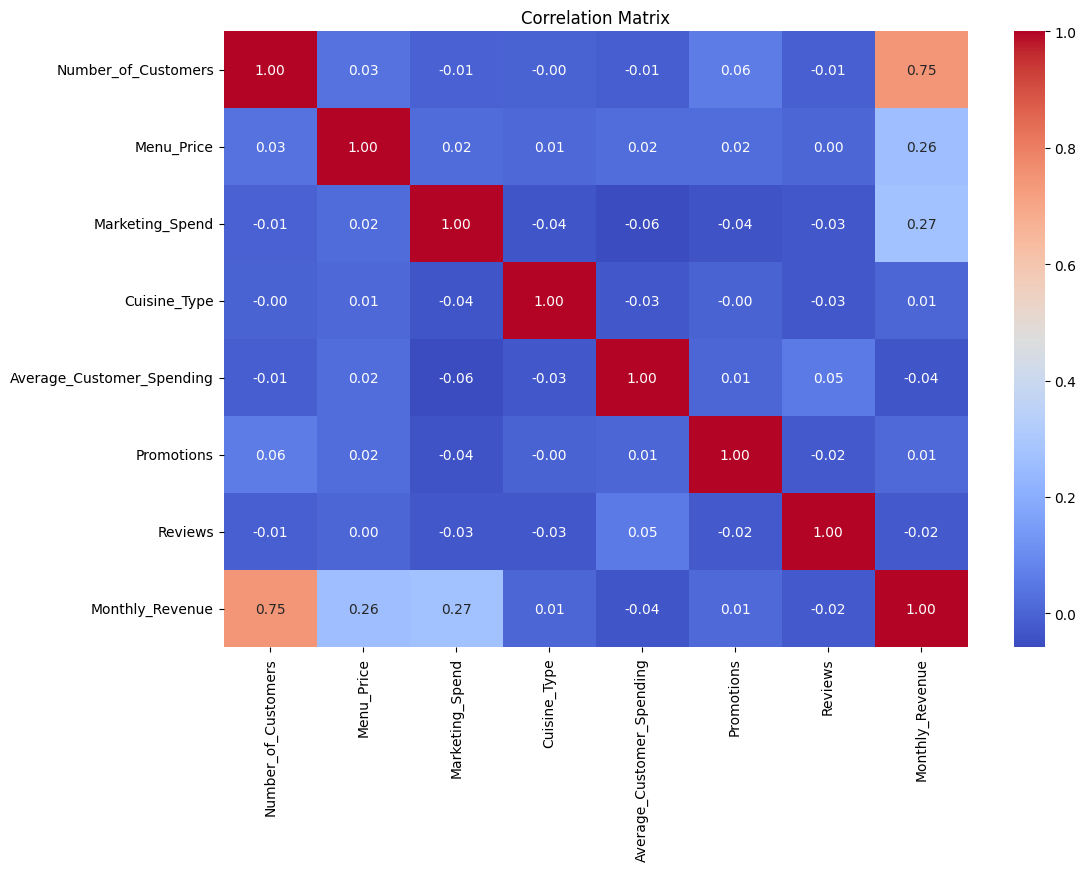

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **Step 5 - Model Building**

#### **Feature Division**

In [ ]:
X = df[top_4_features.index]

X.head()

,Number_of_Customers,Marketing_Spend,Menu_Price,Average_Customer_Spending
0,61,12.663793,43.117635,36.236133
1,24,4.577892,40.020077,17.952562
2,81,4.652911,41.981485,22.600420
3,70,4.416053,43.005307,18.984098
4,30,3.475052,17.456199,12.766143


In [ ]:
Y = df["Monthly_Revenue"]

#### **Data Division**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### **Modelling**

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

#### **Evaluate**

In [ ]:
def evaluate_model(Y_test, pred):
  mae = mean_absolute_error(Y_test, pred)
  mse = mean_squared_error(Y_test, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(Y_test, pred)

  evaluation_metrics = {
      'MAE': mae,
      'MSE': mse,
      'RMSE': rmse,
      'R2 Score': r2
  }

  return evaluation_metrics

In [ ]:
evaluate_model(Y_test, pred)

{'MAE': 46.69044763341824,
 'MSE': 3605.6436135740882,
 'RMSE': 60.04701169562136,
 'R2 Score': 0.69639705137649}

#### **Decision Tree Regressor**

In [ ]:
models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree" : DecisionTreeRegressor(),
    "ADA Regressor" : AdaBoostRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "Random Forest" : RandomForestRegressor()
}

In [ ]:
for name, model in models.items():
  print(f"Name of the model: {name}")
  model.fit(X_train, Y_train)

  pred = model.predict(X_test)

  print(evaluate_model(Y_test, pred))
  print("============================================")

Name of the model: Linear Regression
{'MAE': 46.69044763341824, 'MSE': 3605.6436135740882, 'RMSE': 60.04701169562136, 'R2 Score': 0.69639705137649}
Name of the model: Decision Tree
{'MAE': 69.37920996687212, 'MSE': 7356.208451559134, 'RMSE': 85.76834177923189, 'R2 Score': 0.38059142390705747}
Name of the model: ADA Regressor
{'MAE': 50.13100672427814, 'MSE': 4030.1123584505444, 'RMSE': 63.48316594539488, 'R2 Score': 0.6606558699524971}
Name of the model: Gradient Boosting
{'MAE': 49.43717440942594, 'MSE': 3838.6593040517896, 'RMSE': 61.95691490101641, 'R2 Score': 0.6767766289813748}
Name of the model: Random Forest
{'MAE': 51.42745752003795, 'MSE': 4249.128719171951, 'RMSE': 65.18534129059961, 'R2 Score': 0.6422142212378319}


In [ ]:
# prompt: Create a sample data for test

import pandas as pd
import numpy as np

# Create a sample dataset with restaurant-related features
data = {
    'Number_of_Customers': np.random.randint(50, 500, 100),
    'Menu_Price': np.random.uniform(10, 50, 100),
    'Marketing_Spend': np.random.uniform(100, 1000, 100),
    'Cuisine_Type': np.random.choice(['Italian', 'Japanese', 'Mexican', 'American'], 100),
    'Average_Customer_Spending': np.random.uniform(15, 40, 100),
    'Promotions': np.random.randint(0, 2, 100),
    'Reviews': np.random.randint(10, 200, 100),
    'Monthly_Revenue': np.random.randint(5000, 50000, 100)
}

df = pd.DataFrame(data)

# Save the sample dataset to a CSV file
df.to_csv('RestaurantRevenuetesting.csv', index=False)

In [ ]:
df_test = pd.read_csv('/content/RestaurantRevenuetesting.csv')

In [ ]:

le = LabelEncoder()
df_test['Cuisine_Type'] = le.fit_transform(df_test['Cuisine_Type'])


X_test_df = df_test[top_4_features.index]


predictions = model.predict(X_test_df)

evaluation_metrics = evaluate_model(df_test['Monthly_Revenue'], predictions)
print(evaluation_metrics)

predictions

{'MAE': 29728.626766040783, 'MSE': 1040554768.9964023, 'RMSE': 32257.631174598086, 'R2 Score': -5.637722929687375}


array([492.45971053, 477.20041645, 489.89479067, 401.70332958,
       480.18290096, 396.97130131, 474.40445201, 403.1714783 ,
       407.77843942, 505.78990217, 485.49441525, 418.41072521,
       394.84373939, 416.89458323, 402.52514148, 490.7145692 ,
       503.17086361, 403.10823068, 516.14343424, 511.45276334,
       349.77969937, 401.07932544, 408.31255925, 401.92337691,
       482.05474316, 392.79497771, 408.20789758, 420.78293396,
       401.83789888, 406.45515825, 402.54065798, 478.85885478,
       396.86603031, 401.28441704, 501.34505728, 480.89197875,
       411.37853953, 421.94383515, 501.85486641, 394.86705694,
       395.69519334, 485.49441525, 401.49474611, 474.0105148 ,
       473.62554745, 400.10590585, 429.09861875, 402.67006943,
       482.60059947, 486.71774882, 419.19317474, 477.67213952,
       352.78808603, 471.68629129, 398.01987317, 410.79615166,
       401.63886818, 410.86931832, 513.46399541, 503.64777627,
       411.81553833, 410.63942991, 399.09985232, 479.71

# **Segmentation Problem**

#### **Feature Selection for Clustering**

In [ ]:
features = ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews']

#### **Scaling of features**

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

#### **Initializing Clustering**

##### **Elbow Method for "K" Selection**

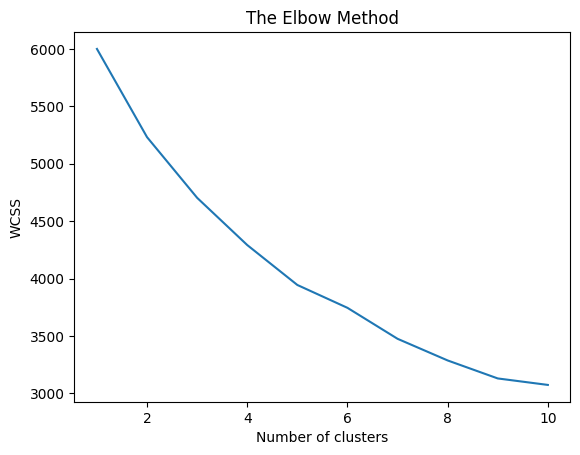

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### **Silhouette Method**

In [ ]:
from sklearn.metrics import silhouette_score

for i in range(2, 7):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_features, labels)
    print("For n_clusters =", i, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.1737427196111144
For n_clusters = 3 The average silhouette_score is : 0.13715944556871634
For n_clusters = 4 The average silhouette_score is : 0.1535623831638231
For n_clusters = 5 The average silhouette_score is : 0.13993147607747575
For n_clusters = 6 The average silhouette_score is : 0.13386673202167995


In [ ]:
kmeans = KMeans(n_clusters = 6)

#### **Model Creation**

In [ ]:
kmeans.fit(scaled_features)

KMeans(n_clusters=6)

#### **Cluster Assignment**

In [ ]:
df['Cluster'] = kmeans.labels_

#### **Results**

In [ ]:
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cluster
0,61,43.117635,12.663793,2,36.236133,0,45,350.912040,5
1,24,40.020077,4.577892,1,17.952562,0,36,221.319091,2
2,81,41.981485,4.652911,2,22.600420,1,91,326.529763,0
3,70,43.005307,4.416053,1,18.984098,1,59,348.190573,0
4,30,17.456199,3.475052,1,12.766143,1,30,185.009121,4


### **Analysis the Cluster Behaviours**

#### **Grabbing Numerical Features**

In [ ]:
numeric_features = df.select_dtypes(include=['number']).columns

#### **Taking an average of all the clusters**

In [ ]:
cluster_analysis = df.groupby('Cluster')[numeric_features].mean()

In [ ]:
cluster_analysis

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Cluster
Cluster,,,,,,,,,
0,53.077465,27.574229,6.476370,1.605634,24.753643,0.985915,77.443662,244.126665,0.0
1,60.491620,32.980559,9.841349,1.424581,41.621328,1.000000,43.709497,287.438199,1.0
2,57.748603,28.790483,12.040526,1.541899,20.249608,0.000000,29.301676,294.252287,2.0
3,27.148352,27.782039,11.434363,1.489011,34.061964,0.032967,64.489011,195.210034,3.0
4,51.517442,30.323690,11.923236,1.500000,20.425380,1.000000,30.738372,275.076432,4.0
5,73.746575,34.072310,6.783392,1.493151,35.443338,0.000000,59.910959,322.563126,5.0


* **Cluster 0**
  * **This cluster has the highest average number of customers, suggesting it might represent popular or well-established restaurants.**
  * **The average menu price is slightly lower than the other clusters, indicating it might offer more affordable options.**
  *

#### **Visualizing in 2-D**

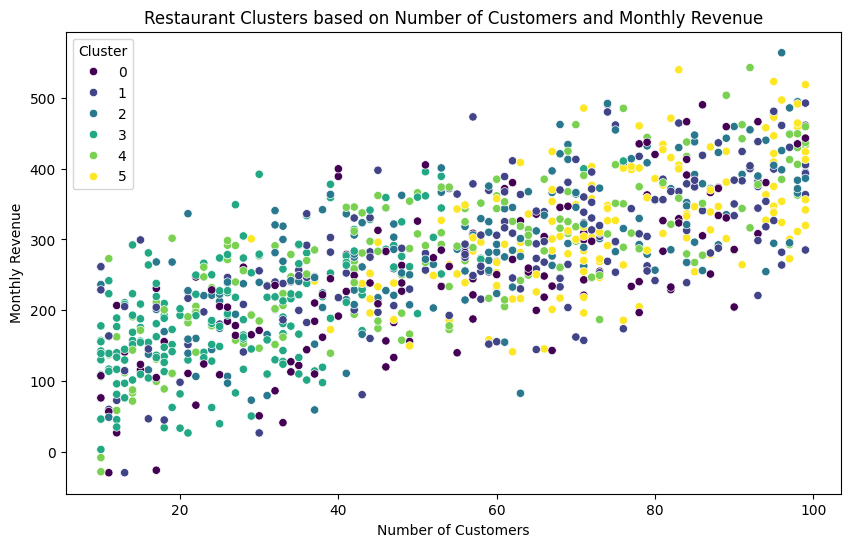

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Customers', y='Monthly_Revenue', hue='Cluster', data=df, palette='viridis')
plt.title('Restaurant Clusters based on Number of Customers and Monthly Revenue')
plt.xlabel('Number of Customers')
plt.ylabel('Monthly Revenue')
plt.show()

#### **Visualizing in 3d**

In [ ]:
fig = px.scatter_3d(df, x='Number_of_Customers', y='Menu_Price', z='Monthly_Revenue', color='Cluster',
                   title='3D Scatter Plot of Restaurant Clusters')
fig.show()
